In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
X

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,1.0,2.74229,3.28500,0,61.0,47,76,0,0,...,0,0,0,0,0,0,0,0,0,1
131658,74.81,7.0,2.81059,0.44500,0,61.0,63,88,0,1,...,0,0,0,0,0,0,0,0,0,1
131659,40.17,10.0,2.99565,3.33625,0,61.0,48,75,0,1,...,0,0,0,0,0,0,0,0,0,0
131660,46.88,4.0,3.04744,4.15750,1,47.0,54,79,1,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()
X_centered.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [5]:
from sklearn.decomposition import PCA

### Your code is here
pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head()

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [6]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

In [7]:
first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

corrs

,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


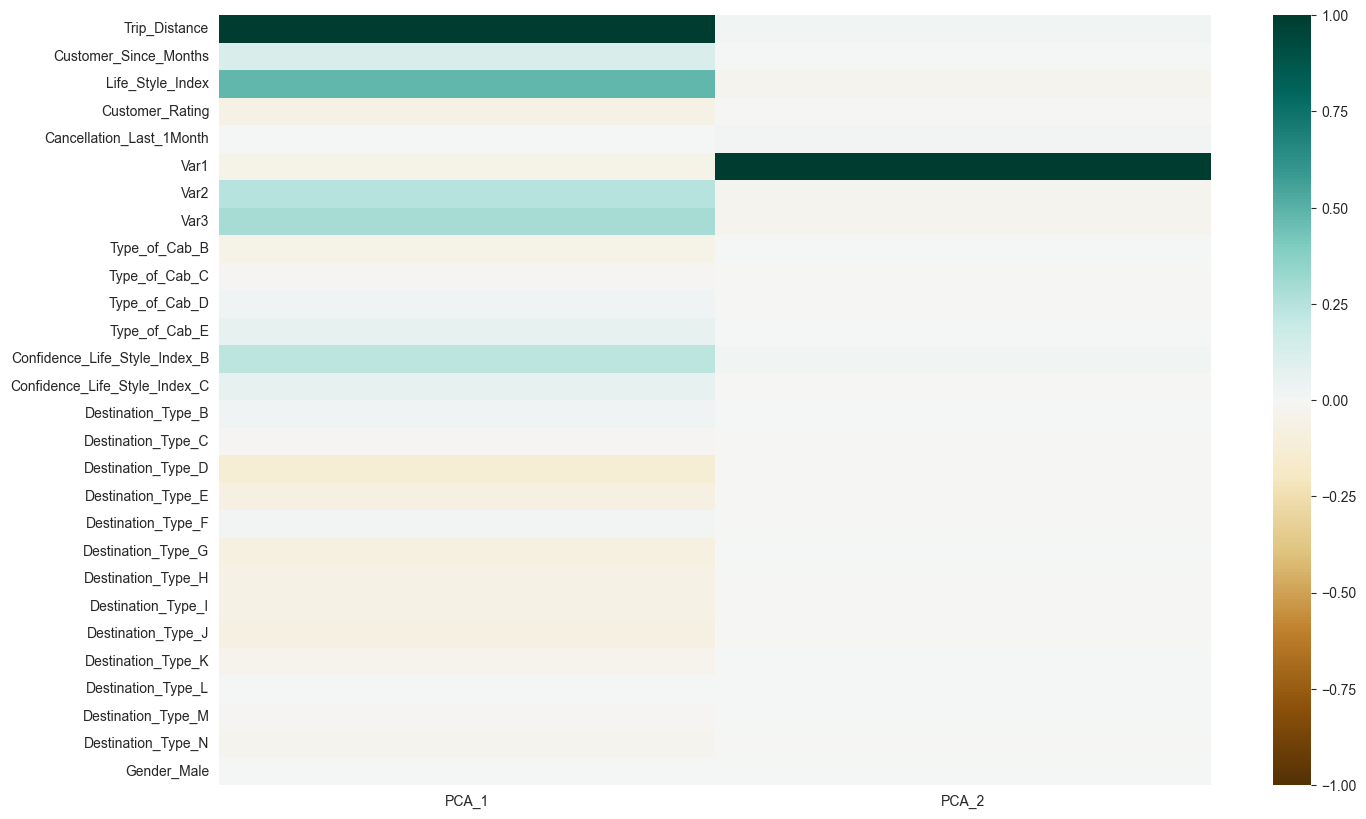

In [8]:
### Your code is here

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [9]:
### Your code is here
PCA_dataset = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)),
                              axis=1)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA1', 'PCA2', 'SEGMENT'])

In [10]:
PCA_dataset

,PCA1,PCA2,SEGMENT
0,-38.743132,-23.282634,2.0
1,-13.209252,-25.023815,2.0
2,-2.004910,-1.637085,2.0
3,17.178458,-0.907657,3.0
4,14.477389,-11.656752,2.0
...,...,...,...
131657,-32.267779,-2.482906,3.0
131658,32.621206,-0.886322,2.0
131659,-4.045367,-1.565545,2.0
131660,3.696395,-15.487904,2.0


Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

<Axes: xlabel='PCA1', ylabel='PCA2'>

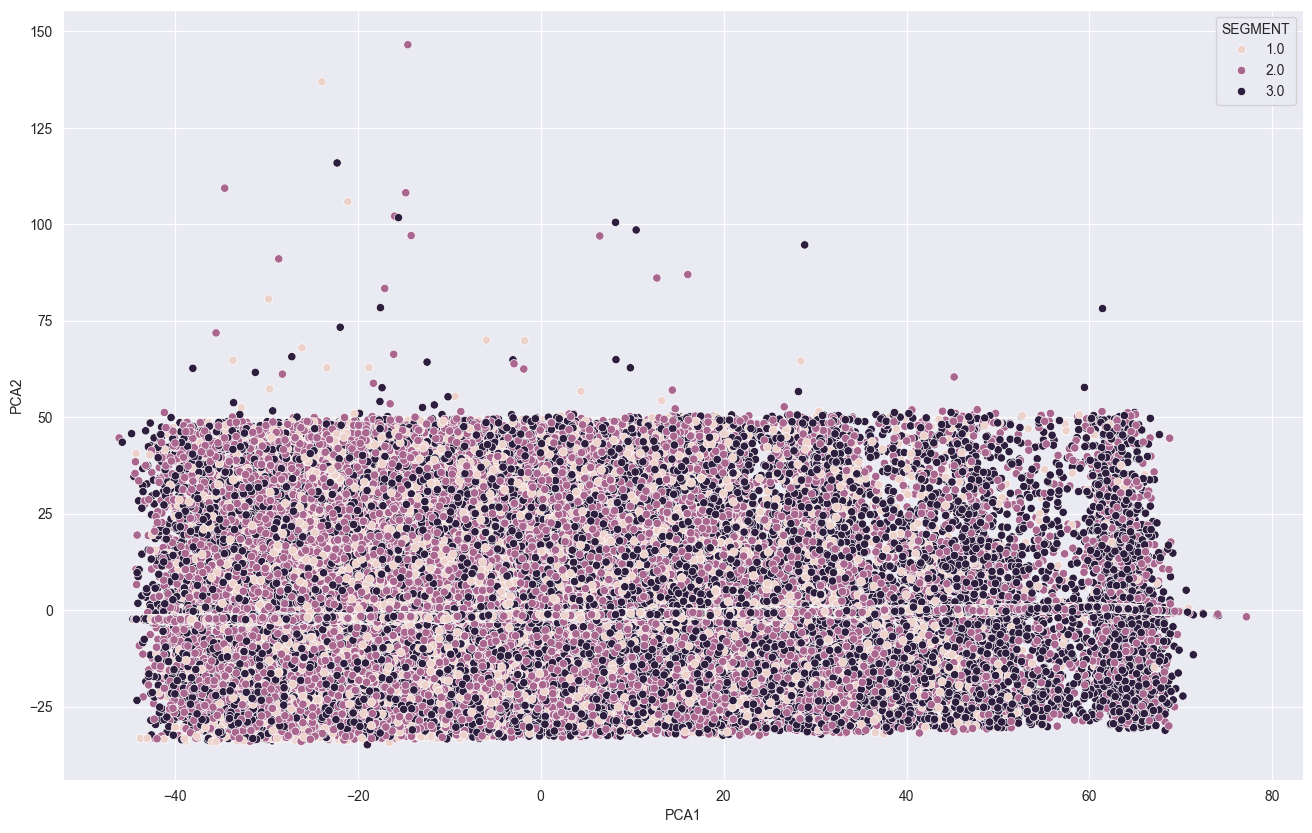

In [11]:
### Your code is here
fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=PCA_dataset, x="PCA1", y="PCA2", hue="SEGMENT")


In [12]:
pca_3d = PCA(n_components=3)

pca_3d.fit(X_centered)

PCA_dataset_3d = pca_3d.transform(X_centered)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [13]:
first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)
corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']
corrs_3d

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


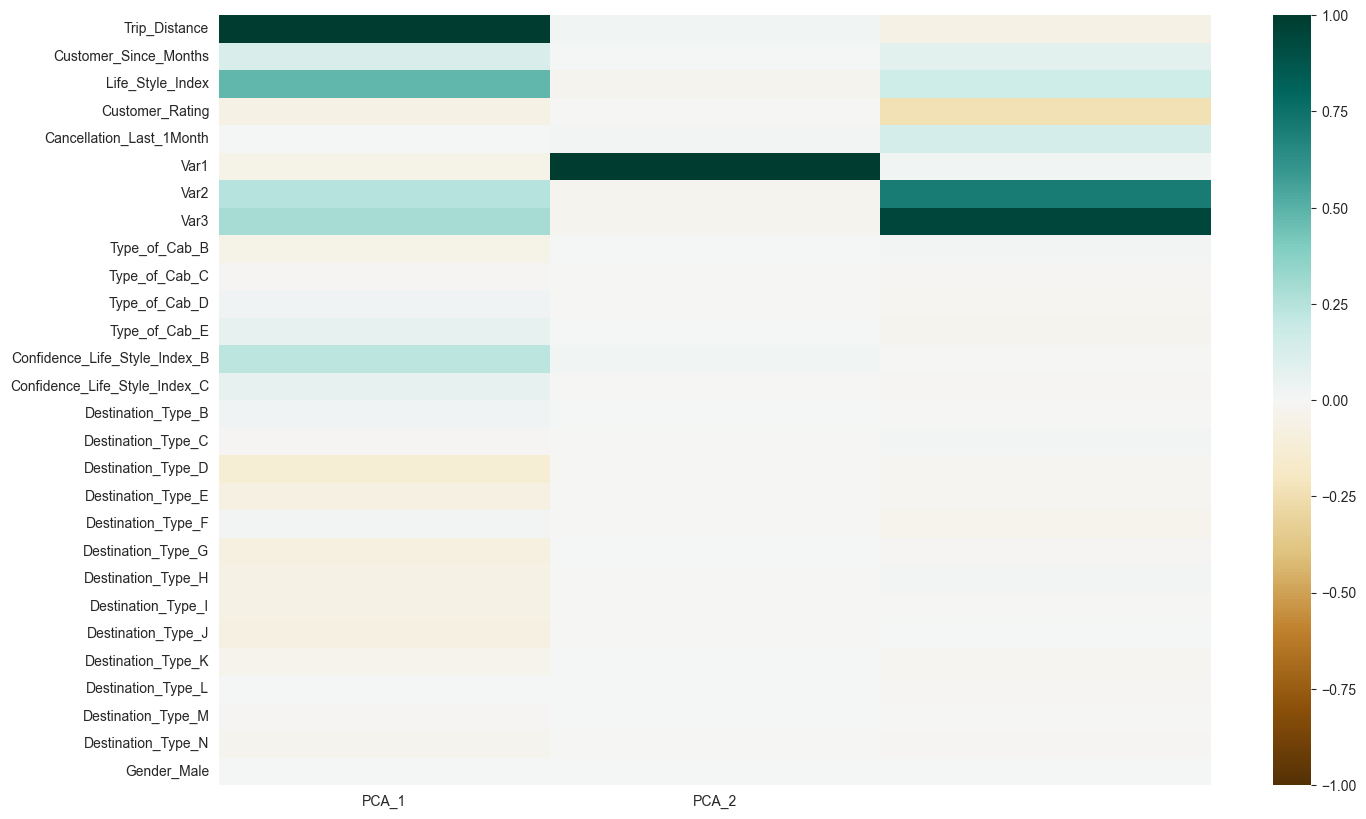

In [14]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d,
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [15]:
PCA_dataset_3d = np.concatenate((PCA_dataset_3d.values, y.values.reshape(-1, 1)),
                                 axis=1)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3', 'SEGMENT'])

In [16]:
PCA_dataset_3d

,PCA_1,PCA_2,PCA_3,SEGMENT
0,-38.743132,-23.282634,-11.303274,2.0
1,-13.209252,-25.023815,5.664106,2.0
2,-2.004910,-1.637085,3.663032,2.0
3,17.178458,-0.907657,-3.191676,3.0
4,14.477389,-11.656752,22.999348,2.0
...,...,...,...,...
131657,-32.267779,-2.482906,3.955203,3.0
131658,32.621206,-0.886322,11.438623,2.0
131659,-4.045367,-1.565545,-0.451941,2.0
131660,3.696395,-15.487904,3.655981,2.0


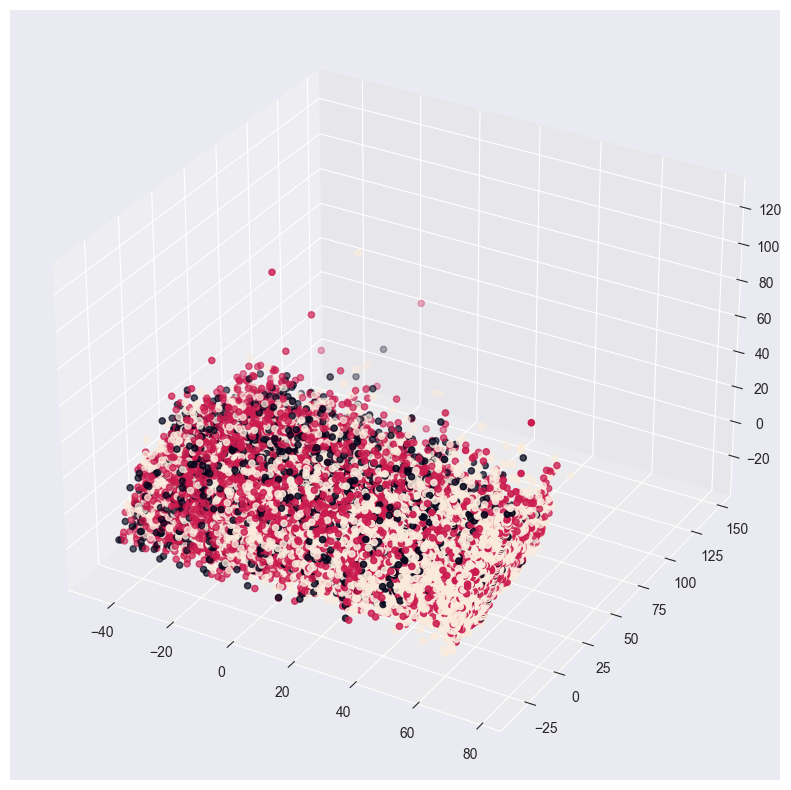

In [17]:
fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d['SEGMENT'].replace(['A', 'B', 'C', 'D'],
                                            ['orange', 'green', 'red', 'blue'])

ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors)

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [18]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [20]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=2)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
report = classification_report(y_test, grid.predict(X_test), digits=3)
print(report)


              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333


In [21]:
report = classification_report(y, grid.predict(X), digits=3)
print(report)

              precision    recall  f1-score   support

           1      0.000     0.000     0.000     27214
           2      0.500     0.000     0.000     56728
           3      0.362     1.000     0.532     47720

    accuracy                          0.362    131662
   macro avg      0.287     0.333     0.177    131662
weighted avg      0.347     0.362     0.193    131662


In [22]:
param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression())
])

# Create the GridSearchCV object
grid = GridSearchCV(pipe, param_grid, cv=5)

# Fit the model on the training data
grid.fit(X_train, y_train)

# Evaluate the model on the test data
report_pca = classification_report(y_test, grid.predict(X_test), digits=3)

# Print the classification report for the model trained on PCA components
print("Classification Report for PCA Model:")
print(report_pca)

# Train a logistic regression model on the original data
original_model = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression())
])
original_model.fit(X_train, y_train)

# Evaluate the model on the test data
report_original = classification_report(y_test, original_model.predict(X_test), digits=3)

# Print the classification report for the model trained on the original data
print("\nClassification Report for Original Model:")
print(report_original)

# Extract and print the f1-score for class "3" for both models
f1_score_pca = classification_report(y_test, grid.predict(X_test), digits=3, output_dict=True)['3']['f1-score']
f1_score_original = classification_report(y_test, original_model.predict(X_test), digits=3, output_dict=True)['3']['f1-score']

print("\nF1-score for class '3' (PCA Model):", f1_score_pca)
print("F1-score for class '3' (Original Model):", f1_score_original)


Classification Report for PCA Model:
              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.478     0.691     0.565     11349
           3      0.492     0.509     0.500      9612

    accuracy                          0.483     26333
   macro avg      0.323     0.400     0.355     26333
weighted avg      0.386     0.483     0.426     26333

Classification Report for Original Model:
              precision    recall  f1-score   support

           1      0.736     0.539     0.622      5372
           2      0.637     0.825     0.719     11349
           3      0.735     0.589     0.654      9612

    accuracy                          0.680     26333
   macro avg      0.702     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333


F1-score for class '3' (PCA Model): 0.5002558591751101
F1-score for class '3' (Original Model): 0.6535373953219752


Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [25]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [27]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy, f1_score = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1_score

print(accuracy_dict)
print(f1_score_dict)

{2: 0.48406941860023545, 4: 0.5421714198913911, 8: 0.5875897163255231, 16: 0.5922986366916037, 28: 0.6813883720047089}
{2: 0.4268841384381068, 4: 0.481248509434958, 8: 0.5181156684625048, 16: 0.5273750370577754, 28: 0.6760757307801638}
CPU times: total: 6min 16s
Wall time: 1min 25s


Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [6]:
from sklearn.manifold import TSNE

### Your code is here



**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [7]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!